In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('XT Mar24_10min.csv', parse_dates = ['Timestamp (UTC)'])
df.head()

,Timestamp (UTC),Open,High,Low,Close,"XT Mar24: MA ‌ma‌ (25,C,ema,0)",XT Mar24: Volume
0,2024-01-30 01:52:00,95.830,95.830,95.825,95.830,95.825753,29
1,2024-01-30 01:42:00,95.830,95.830,95.825,95.825,95.825399,595
2,2024-01-30 01:32:00,95.825,95.830,95.820,95.830,95.825432,545
3,2024-01-30 01:22:00,95.825,95.825,95.820,95.820,95.825052,595
4,2024-01-30 01:12:00,95.820,95.825,95.820,95.825,95.825473,1521


In [3]:
df.rename(columns={'XT Mar24: Volume': 'Volume', 'Timestamp (UTC)':'Timestamp'}, inplace=True) #saving in df by usjng inplace = True
df.sort_values(by = 'Timestamp', inplace = True) #sorting before setting it as index
df.set_index('Timestamp', inplace = True) #setting index

In [4]:
df.head()

,Open,High,Low,Close,"XT Mar24: MA ‌ma‌ (25,C,ema,0)",Volume
Timestamp,,,,,,
2024-01-08 06:12:00,95.830,95.830,95.825,95.830,NaN,318
2024-01-08 06:22:00,95.825,95.825,95.825,95.825,NaN,731
2024-01-08 06:32:00,95.825,95.830,95.825,95.830,NaN,272
2024-01-08 06:42:00,95.830,95.830,95.825,95.825,NaN,125
2024-01-08 06:52:00,95.825,95.830,95.825,95.830,NaN,278


In [5]:
df['returns'] = df['Close'].pct_change() #% change from previous
df.head()

,Open,High,Low,Close,"XT Mar24: MA ‌ma‌ (25,C,ema,0)",Volume,returns
Timestamp,,,,,,,
2024-01-08 06:12:00,95.830,95.830,95.825,95.830,NaN,318,NaN
2024-01-08 06:22:00,95.825,95.825,95.825,95.825,NaN,731,-0.000052
2024-01-08 06:32:00,95.825,95.830,95.825,95.830,NaN,272,0.000052
2024-01-08 06:42:00,95.830,95.830,95.825,95.825,NaN,125,-0.000052
2024-01-08 06:52:00,95.825,95.830,95.825,95.830,NaN,278,0.000052


In [6]:
df = df.dropna()
df.head()

,Open,High,Low,Close,"XT Mar24: MA ‌ma‌ (25,C,ema,0)",Volume,returns
Timestamp,,,,,,,
2024-01-08 10:12:00,95.835,95.835,95.830,95.830,95.826200,357,-0.000052
2024-01-08 10:22:00,95.830,95.835,95.830,95.835,95.826877,222,0.000052
2024-01-08 10:32:00,95.835,95.835,95.830,95.830,95.827117,544,-0.000052
2024-01-08 10:42:00,95.830,95.830,95.830,95.830,95.827339,286,0.000000
2024-01-08 10:52:00,95.830,95.830,95.825,95.825,95.827159,81,-0.000052


In [7]:
df.size

14224

In [8]:
df.shape

(2032, 7)

In [9]:
StockReturns = df['returns']

Timestamp
2024-01-08 10:12:00   -0.000052
2024-01-08 10:22:00    0.000052
2024-01-08 10:32:00   -0.000052
2024-01-08 10:42:00    0.000000
2024-01-08 10:52:00   -0.000052
Name: returns, dtype: float64


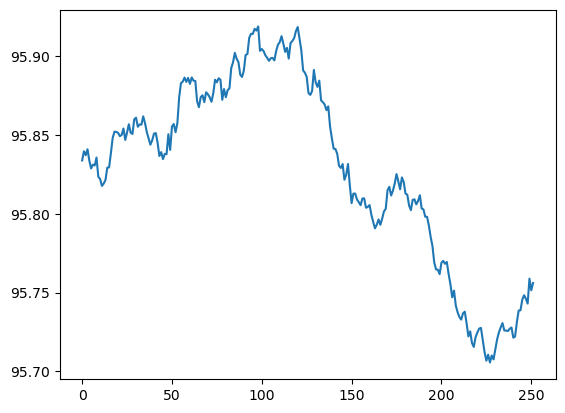

In [10]:
import numpy as np
# Set the simulation parameters
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252
S0 = 95.835 # take a start price
print(StockReturns.head())
# Add one to the random returns
rand_rets = np.random.normal(mu,vol,T) + 1

# Forecasted random walk
forecasted_values = S0*(rand_rets.cumprod())

import matplotlib.pyplot as plt
# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

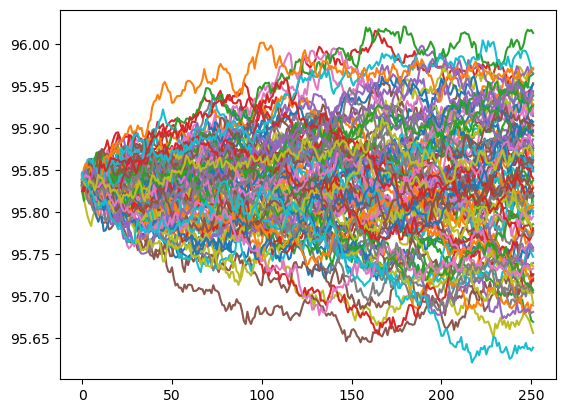

In [11]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [26]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 100-99)
print("Simulation VaR(99): ", round(100*var_99, 2),"%")

Simulation VaR(99):  -0.01 %
